## For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code
import pandas as pd
np.random.seed(123)

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

a. What is the probability that no cars drive up in the noon hour?

b. What is the probability that 3 or more cars come through the drive through?

c. How likely is it that the drive through gets at least 1 car?

Text(0, 0.5, '$P(X = x)$')

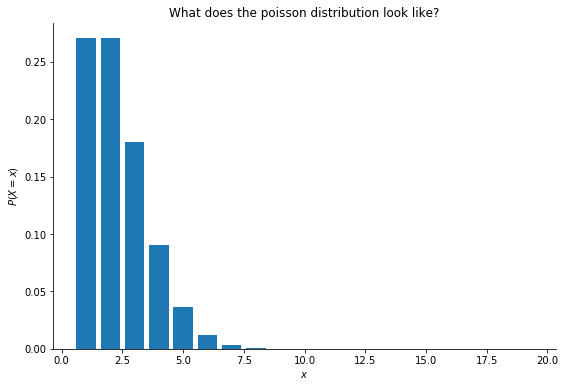

In [13]:
x = np.arange(1, 20)
y = stats.poisson(2).pmf(x)

plt.bar(x, y)
plt.title('What does the poisson distribution look like?')
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')

In [14]:
# 1a. What is the probability that no cars drive up in the noon hour?
stats.poisson(2).pmf(0)

0.1353352832366127

In [15]:
# Simulation
cars = np.random.poisson(2, size=100000)
cars = pd.Series(cars)
(cars == 0).mean()

0.13582

In [16]:
# 1b. What is the probability that 3 or more cars come through the drive through?
# greater than does not include equal to, so greater than 2 to include 3
stats.poisson(2).sf(2)

0.32332358381693654

In [17]:
# Simulation
(cars>=3).mean()

0.32392

In [18]:
# 1c. How likely is it that the drive through gets at least 1 car? = 1 car or more
stats.poisson(2).sf(0)

0.8646647167633873

In [19]:
# Simulation
(cars>=1).mean()

0.86418

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard 
deviation of.3. Calculate the following:

    a. What grade point average is required to be in the top 5% of the graduating class?
    
    b. What GPA constitutes the bottom 15% of the class?
    
    c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
        Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
        
    If I have a GPA of 3.5, what percentile am I in?

In [44]:
# 2a. What grade point average is required to be in the top 5% of the graduating class?
gpa = stats.norm(3, .3)
top5 = round(gpa.ppf(.95), 2)
print(f'The minimum GPA to be in the top 5% is {top5}')

The minimum GPA to be in the top 5% is 3.49


In [45]:
# Simulation
gpa = np.random.normal(3, .3, 100000)
simtop5 = round(np.percentile(gpa, 95), 2)
simtop5

3.49

In [48]:
# 2b. What GPA constitutes the bottom 15% of the class?
gpa = stats.norm(3, .3)
bottom15 = round(gpa.ppf(.15), 2)
print(f'A GPA of {bottom15} or below is in the bottom 15% of the class')


A GPA of 2.69 or below is in the bottom 15% of the class


In [50]:
# Simulation
gpa = np.random.normal(3, .3, 100000)
round(np.percentile(gpa, 15), 2)

2.69

In [36]:
# 2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
# Determine the range of the third decile. 
# exobrain https://www.investopedia.com/terms/d/decile.asp
# 3rd decile from bottom = scores from 20-29 out of 100

top_cutoff = gpa.ppf(.29)
bottom_cutoff = gpa.ppf(.19)
print(f'Highest GPA in 3rd decile is {top_cutoff}')
print(f'Lowest GPA in 3rd decile is {bottom_cutoff}')

# Would a student with a 2.8 grade point average qualify for this scholarship?
print(bottom_cutoff <= 2.8 <= top_cutoff)

# If I have a GPA of 3.5, what percentile am I in?
gpa.cdf(3.5)

Highest GPA in 3rd decile is 2.8339845841332982
Lowest GPA in 3rd decile is 2.7366311114846313
True


0.9522096477271853

In [51]:
# Simulation
gpa = np.random.normal(3, .3, 100000)
top_cut = np.percentile(gpa, 29)
bot_cut = np.percentile(gpa, 20)
print(f'Highest GPA in 3rd decile is {top_cut}')
print(f'Lowest GPA in 3rd decile is {bot_cut}')

# Would a student with a 2.8 grade point average qualify for this scholarship?
print(bot_cut <= 2.8 <= top_cut)

# If I have a GPA of 3.5, what percentile am I in?
(gpa<=3.5).mean()

Highest GPA in 3rd decile is 2.833949522112724
Lowest GPA in 3rd decile is 2.748921566170153
True


0.95122

3. A marketing website has an average click-through rate of 2%. 
One day they observe 4326 visitors and 97 click-throughs. 
How likely is it that this many people or more click through?

In [52]:
# similar problem in lesson
# p_sucess = overall_message_open_rate
# n_trials = 688
# stats.binom(n_trials, p_sucess).cdf(160)

# problem set up
clickrate = .02
trials = 4326
clicks = 97
# need formula for or more (not less like lesson example), sf not inclusive adjust to 96
stats.binom(trials, clickrate).sf(96)


0.1397582363130086

In [53]:
# simulation
clicks = np.random.binomial(4326, 0.02, 100000)
(clicks>=97).mean()

0.14049

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [54]:
# need to calculate probability of success of guessing 2 digit number correctly
# using .00 to .99 range of answers probability of getting 1 correct is 1/100
# curriculum example: stats.binom(30, .25).sf(10) = this is probability 10 out of 30 correct

stats.binom(60, .01).sf(0)

0.4528433576092388

In [55]:
# simulation
answers = np.random.binomial(60, .01, 100000)
(answers>=1).mean()

0.45348

In [ ]:
# see Zach notes for comparing 2 sets of random answers with .any(axis=1)

5. The codeup staff tends to get upset when the student break area is not cleaned up. 

Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

How likely is it that the break area gets cleaned up each day? 

How likely is it that it goes two days without getting cleaned up? 

All week?

In [56]:
# trials = # people who might clean = 3*22*.9 rounded down to 59
# "cleaned up each day" interpreted to mean a minimum of 1 person cleans that day
stats.binom(59, .03).sf(0)

0.8342199288437355

In [62]:
#simulation
clean1 = np.random.binomial(59, .03, 100000)
(clean1>=1).mean()

0.83394

In [57]:
# How likely is it that it goes two days without getting cleaned up?
# trial doubles because have same # of people each day
# use 1- because asking for probability NOT cleaned in 2 days
1-(stats.binom(118, 0.03).sf(0))

0.02748303199257618

In [65]:
# simulation
clean2 = np.random.binomial(118, .03, 100000)
1-((clean2>=1).mean())

0.026880000000000015

In [6]:
# All week?
# interpreted to mean probability it will not be cleaned 1 time on any day of the 5 day school week
# use 5 * 59 for trails because there are 59 chances someone will clean each day and 5 days in school week
# looking for value equal to 0, use .pmf for descrete values
stats.binom((5*59), 0.03).pmf(0)

0.00012521651388091353

In [4]:
# simulation
clean = np.random.binomial((5*59), .03, 100000)
(clean==0).mean()

0.00012

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 

After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 

If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 

Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [26]:
# use norm because have mean and standard dev
# use algebra to solve 60-2x+10>=15, get x<=17.5
# less than or equal to is .cdf
stats.norm(15, 3).cdf(17.5)

0.7976716190363569

In [29]:
# simulation
# get samples of line size from normal distribution with mean of 15 and stand dev of 3
line = np.random.normal(15, 3, 500000)
# convert floats to integers because can't have part of a person in line
line = line.astype(int)
# 2 minutes per person to order
time = line * 2
# add 10 to each time for waiting for food
time = time + 10
# now I have an array of possible time it will take to get food I have 60 min total for lunch and need 
# a minimum of 15 min remaining 
time = 60 - time
# now I have an array of times and want the average where the time left is greater than or equal to 15
(time>=15).mean()

0.841112

In [54]:
# after walk through
lunchtime = 60
eat = 15
getfood = 10

linetime = 15 * 2 # converts people to wait time
stddev = 3 * 2 # converts stddev to minutes

maxwait = lunchtime - getfood - eat
stats.norm(linetime, stddev).cdf(maxwait)

0.7976716190363569

In [56]:
# after walk through
# simulation
lunch = np.random.normal(linetime, stddev, 100000)
(lunch<=maxwait).mean()

0.79695

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

a. What percent of employees earn less than 60,000?

b. What percent of employees earn more than 95,000?

c. What percent of employees earn between 65,000 and 80,000?

d. What do the top 5% of employees make?


In [27]:
# use previously defined function to get url
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [36]:
# note from walk through - forgot to get only current employees

# query for average salary and stddev, note: current values only
query = """select avg(salary), stddev(salary) from salaries where to_date > now();"""
avgstddev = pd.read_sql(query, get_db_url('employees'))
avgstddev

,avg(salary),stddev(salary)
0,72012.2359,17309.959336


In [30]:
# 7a. What percent of employees earn less than 60,000?
stats.norm(72012, 17310).cdf(60000)

0.2438617554963023

In [39]:
# query dataset for counts under 60,000
query = """select count(salary) total, (select count(salary) from salaries where to_date > now() and salary < 60000) under_60K from salaries where to_date > now();"""
dfunder60K = pd.read_sql(query, get_db_url('employees'))
dfunder60K

,total,under_60K
0,240124,64971


In [42]:
# use counts from query to calculate percentage under 60K
dfunder60K.under_60K / dfunder60K.total

0    0.270573
dtype: float64

In [31]:
# 7b. What percent of employees earn more than 95,000?
stats.norm(72012, 17310).sf(95000)

0.09208599994106093

In [43]:
# query dataset for counts over 95,000
query = """select count(salary) total, (select count(salary) from salaries where to_date > now() and salary > 95000) over95K from salaries where to_date > now();"""
dfover95K = pd.read_sql(query, get_db_url('employees'))
dfover95K

,total,over95K
0,240124,26084


In [44]:
# use counts from query to calculate percentage under 60K
dfover95K.over95K / dfover95K.total

0    0.108627
dtype: float64

In [34]:
# 7c. What percent of employees earn between 65,000 and 80,000?
# what percent earn 80,000 or less
topcut = stats.norm(72012, 17310).cdf(80000)
botcut = stats.norm(72012, 17310).cdf(65000)
# to get % between subtract ?
between = topcut - botcut
between

0.335060363819384

In [48]:
# query for count of salaries between 65K and 80K, use total from previous to divide
query = """select count(salary) myvalue from salaries where to_date > now() and salary >= 65000 and salary <=80000;"""
dfbetween = pd.read_sql(query, get_db_url('employees'))
dfbetween

,myvalue
0,78078


In [49]:
dfbetween.myvalue/dfover95K.total

0    0.325157
dtype: float64

In [33]:
# 7d. What do the top 5% of employees make?
stats.norm(72012, 17310).isf(.05)

100484.41628253

In [51]:
# simulation
# query get all current salaries
query = """select salary from salaries where to_date > now();"""
dfall = pd.read_sql(query, get_db_url('employees'))
dfall

,salary
0,88958
1,72527
2,43311
3,74057
4,94692
...,...
240119,52868
240120,69501
240121,83441
240122,55003


In [52]:
dfall.salary.quantile(.95)

104225.84999999998